# Machine Learning Engineer Nanodegree
## Capstone Project - Supervised Learning
## Project: Predict *Housing Price* of Russia under different macro environment

## Dataset Introduction 

Quote from https://www.kaggle.com/c/sberbank-russian-housing-market

Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

In this competition, Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

----
## PART 1: Exploring the Data

In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#Read dataset with pandas
train_data = pd.read_csv("train.csv", quoting = 2)
test_data = pd.read_csv("test.csv", quoting = 2)
macro_data = pd.read_csv("macro.csv", quoting = 2)

# Success - Display the first record
display(individual_data.head(n=1))
display(macro_data.head(n=1))

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1.0,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


### Implementation: Data Exploration

/Applications/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


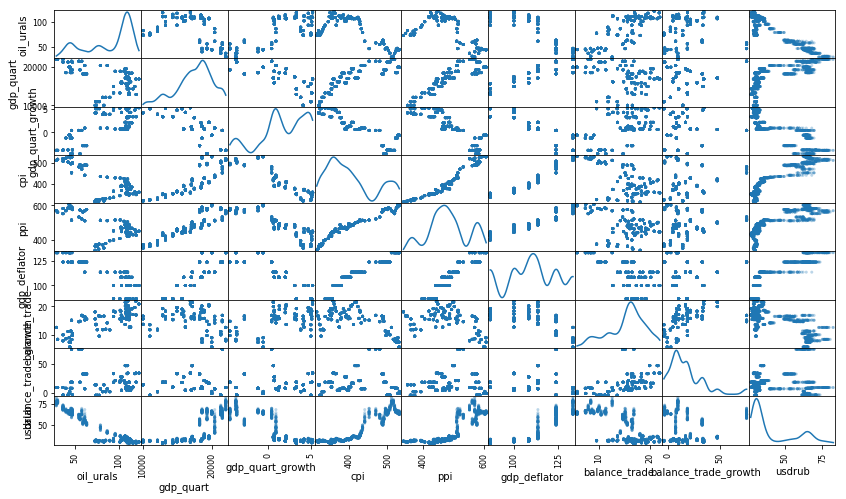

In [23]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(macro_data.iloc[:, :10], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Implementation: Data Preprocessing

In [24]:
#Separate data into X,y
train_data_y = train_data.iloc[:,-1]
train_data_X = train_data.iloc[:,1:-1]
test_data_X = test_data.iloc[:,1:]
#join macro environment
train_data_X = pd.merge(train_data_X, macro_data, left_on='timestamp', right_index=True,
                  how='left', sort=False);
train_data_X = train_data_X.iloc[:,1:]
#join macro environment
test_data_X = pd.merge(test_data_X, macro_data, left_on='timestamp', right_index=True,
                  how='left', sort=False);
test_data_X = test_data_X.iloc[:,1:]

In [25]:
#One hot encoder for categorial variable
mixed_data_X = train_data_X.append(test_data_X, ignore_index=True)
length_train = len(train_data_X)
mixed_data_X = pd.get_dummies(mixed_data_X)

In [26]:
#Drop feature with no valid data available
templist = []
for i in range(0, len(mixed_data_X.iloc[0])):
    if((np.isnan(np.max(mixed_data_X.iloc[:,i])))):
        templist.append(i)

mixed_data_X = pd.DataFrame(mixed_data_X).drop(mixed_data_X.columns[templist], axis = 1)

train_data_X = mixed_data_X.iloc[:length_train,:]
test_data_X = mixed_data_X.iloc[length_train:,:]

In [ ]:
for i in range (0, len(train_data_X.iloc[0]/12)):
    train_data_X.iloc[:, i:(i+12)].hist(figsize = (10,10))
    test_data_X.iloc[:, i:(i+12)].hist(figsize = (10,10))

/Applications/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
#Convert all the string into float via hacky ways
def convert_to_float(dataset):

    for i in range(0,len(dataset[1])):
        for j in range(0, len(dataset)):
            if type(dataset[j,i]) is str:
                if dataset[j,i] == '#!':
                    dataset[j,i] = np.nan
                else:
                    dataset[j,i] = float(dataset[j,i].replace(',','').replace("-", ""))

    return dataset

In [ ]:
def fillMissingValue(df, fy):

    df = pd.DataFrame(df)
    train_data_temp = df[df.iloc[:,fy].notnull()]  
    test_data_temp = df[df.iloc[:,fy].isnull()]  
    train_y=train_data_temp.iloc[:,fy]
    train_X=train_data_temp.copy()
    train_X = train_X.drop(train_X.columns[fy], axis = 1)
    test_X = test_data_temp.copy()
    test_X = test_X.drop(test_X.columns[fy], axis =1)
    mixed_X = Imputer().fit_transform(train_X.append(test_X, ignore_index=True))
    length_train = len(train_X)
    train_X = mixed_X[:length_train,:]
    test_X = mixed_X[length_train:,:]
    
    print ("Try to fill-up value with rfr")
    rfr_regressor=rfr(n_estimators=100, verbose = 5, n_jobs = -1)
    #train the regressor
    rfr_regressor.fit(train_X,train_y)
    y_pred = rfr_regressor.predict(test_X)
    
    df[fy][df.iloc[:,fy].isnull()] = y_pred
    
    
    return df.values

In [ ]:
def findMissingValue(X):
    #Check out Empty Data
    EmptyDataList = []
    for i in range(0, len(X[0])):
        if((np.isnan(np.min(X[:,i])))):
            EmptyDataList.append(i)

    return EmptyDataList

In [ ]:
#Convert into Float for further operation
train_data_X = convert_to_float(train_data_X.values)
test_data_X = convert_to_float(test_data_X.values)

#find MissingValue with return list of index of missing value
emptyList_train = findMissingValue(train_data_X)
emptyList_test = findMissingValue(test_data_X)

In [ ]:
#set MissingValue with Random Forest
for i in emptyList_train:
    print ("Filling-up Train column : " + str(i))
    train_data_X = fillMissingValue(train_data_X, i)
    print ("The result of fill-up value = " + str(np.isnan(np.min(train_data_X[:,i]))))


for i in emptyList_test:
    print ("Filling-up Test column : " + str(i))
    test_data_X = fillMissingValue(test_data_X, i)
    print ("The result of fill-up value = " + str(np.isnan(np.min(test_data_X[:,i]))))

In [ ]:
pd.DataFrame(train_data_X).to_csv("./ExtractedFeature/train_data_X_rfr_100.csv", index=False)

pd.DataFrame(test_data_X).to_csv("./ExtractedFeature/test_data_X_rfr_100.csv", index=False)

----
## PART 2: Measurement of Model

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

In [ ]:
def rmsle(predicted, actual):
    return np.sqrt(np.nansum(np.square(np.log(predicted + 1) - np.log(actual + 1)))/float(len(predicted)))

----
## PART 3a: Model Implementation - XGBoost

In [ ]:
# Setup Model_1 - XGboost
from xgboost import XGBRegressor as xgb
xgb_regressor = xgb(verbose = 10, n_jobs = -1)

In [ ]:
xgb_parameter = {'learning_rate': [0.01, 0.08 , 0.9],
              'min_child_weight': [1, 5, 10],
                 'max_depth': [5, 7, 9],
                 'subsamples': [0.6, 0.8, 1.0],
              'random_state': [2017]}

----
## PART 3b: Model Implementation - Deep Learning with ANN

----
## PART 4: Model Optimization 

In [ ]:
def AutoGridSearch(parameters, regressor):

    scorer = make_scorer(rmsle, greater_is_better=False)
#    while True:
    
    #Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scorer,
                               cv = 10,
                               verbose=10,
                               n_jobs = -1)
    
    #Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(train_data_X, train_data_y)
    
    #if(best_score < grid_fit.best_score_):
    best_score = grid_fit.best_score_
        
        
    best_parameters = grid_fit.best_params_
    
    return best_score, best_parameters

In [ ]:
# GridSearch to get the best parameter
xgb_best_score, xgb_best_parameters = AutoGridSearch(xgb_parameters,xgb_regressor)

In [ ]:
xgb_regressor = xgb(learning_rate = 0.0825, min_child_weight = 1, max_depth = 7, subsamples = 0.8, verbose = 10, random_state = 2017, n_jobs = -1)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [8]:
# predict always >50K
accuracy = n_greater_50k * 1.0 / n_records

recall = n_greater_50k / n_greater_50k 

beta = 0.5

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = (1 + beta * beta) * (accuracy) / ((beta * beta * accuracy) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)



Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: ** </br>
1. Decision Tree</br>
   - Real-world application: Application of a range of machine learning methods to problems in agriculture and horticulture  http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html 
   - Strength of the model: Easy to interpret, clear to explain; Non-parametic so don't have to worry about outliers
   - Weakness of the model: Will easily overfit if the dataset is not large enough while there is large number of features
   - Why we want to use that: We have more than 40,000 dataset in this csv (biggest in first 3 nanodegree project) which allows us to overcome the problem of fitting

</br>
2. Logistic Regression</br>
   - Real-world application: Credit Risk Analysis http://smartdrill.com/logistic-regression.html
   - Strength of the model: Fast to compute, scalable & easy to implement
   - Weakness of the model: Assuming data is linearly separable, cannot handle xor problem
   - Why we want to use that: there is potential correlation between features (given there are 90 in total) but LR can handle that with some regularization method. Also probably there will be much more census data if we need in future, which LR can easily update the model to take in new data (using stochastic  gradient descent method)

</br>
3. Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)</br>
   - Real-world application: Kinect image classification of 6 body levels https://www.youtube.com/watch?v=gwovIigpkTo 
   - Strengthe of the model: avoid easily overfitting with single classifier given voting / bagging
   - Weakness of the model: Complicated to implement, usually computational intensive
   - Why we want to use that: we have 90 features in the data which allows us to create meaningful forest to capture most of the potential impact of the features towards the data


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**
I believe following features will be the most important (with priority):
1. Education Level - which allows people to have a higher income job generally
2. Occupation - the scope & level of the jobs will affect the income directly
3. Marriage - supposed people who married have higher affordability
4. Sex - Male usually have higher income due to gender inequality
5. Age - people who are older = more working experience suppose have higher income

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

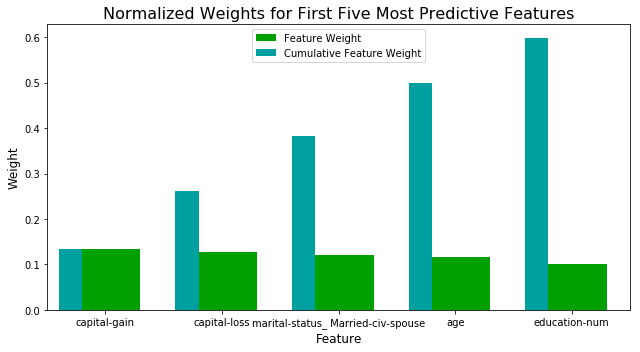

important features in descending order


,importances,features
2,0.134916,capital-gain
3,0.126455,capital-loss
30,0.120483,marital-status_ Married-civ-spouse
0,0.11647,age
1,0.0999521,education-num
4,0.0721541,hours-per-week
38,0.0335374,occupation_ Exec-managerial
39,0.0257507,occupation_ Farming-fishing
54,0.0249573,relationship_ Wife
42,0.0237199,occupation_ Other-service


In [17]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

# sort the features
a = np.array(importances)
factors = pd.DataFrame(data = np.array([importances.astype(float), features.columns]).T,
                       columns = ['importances', 'features'])
factors = factors.sort_values('importances', ascending=False)

print "important features in descending order"
display(factors[:90])

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**
Correct:
1. Marriage status contributes ~0.2 of the importance
2. Education contriubtes ~0.2 (Prof-school, Masters, Doctorate, Bachelors)
3. Occupation contributes ~0.1 (Manager, Sales, Other-services)

Incorrect:
1. Capital Gain/Loss contributes ~0.26 of the importance 
2. Sex - glad to see it is not in top 20 features which has less than 0.01 importance
2. Race - same as above


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [18]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8494
F-score on testing data: 0.7008

Final Model trained on reduced data
------
Accuracy on testing data: 0.8356
F-score on testing data: 0.6690


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**
Accuracy & F-score dropped around 1 - 2.5% for reduced data comparing to all data. If training time was a factor, I will consider using the reduced data given it will run much faster while perserved >97% of the necessary information with reduce 85 feature number 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.